In [1]:
#@title Imports
# !pip install -q symbulate
from symbulate import *

# !pip install tabulate
from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1

In [2]:
n = 5
p = 0.455

Binomial(n, p).cdf(0)

0.048081998590624966

In [3]:
mu = 1.24

Poisson(mu).cdf(0)

0.28938421793905067

In [4]:
xs = range(0, n + 1)
print(tabulate({'x': list(xs) + ['6+'],
                'p_0(x)': [Binomial(n, p).pmf(x) for x in xs] + [0],
                'p_1(x)': [Poisson(mu).pmf(x) for x in xs] + ['>0'],
                'T(x) = p_1(x) / p_0(x)': [Poisson(mu).pmf(x) / Binomial(n, p).pmf(x) for x in xs] + ['infinity']},
               headers = 'keys', floatfmt=".4f"))

x      p_0(x)  p_1(x)                T(x) = p_1(x) / p_0(x)
---  --------  --------------------  ------------------------
0      0.0481  0.2893842179390506    6.018556350015669
1      0.2007  0.3588364302444228    1.7878419258639962
2      0.3351  0.22247858675154217   0.6638591063180708
3      0.2798  0.09195781585730409   0.32867105058589896
4      0.1168  0.028506922915764267  0.2440834021823632
5      0.0195  0.007069716883109535  0.3625309081205295
6+     0.0000  >0                    infinity


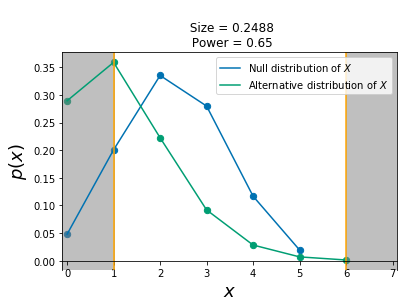

In [5]:
size = Binomial(n, p).cdf(1) + 1 - Binomial(n, p).cdf(5)

power = Poisson(mu).cdf(1) + 1 - Poisson(mu).cdf(5)

Binomial(n, p).plot()
Poisson(mu).plot()



plt.legend([r'Null distribution of $X$',
            r'Alternative distribution of $X$']);
plt.xlim(-0.1, 7.1);
plt.axvline(x = 1, color = 'orange');
plt.axvspan(-0.1, 1, alpha = 0.5, color = 'gray');
plt.axvline(x = 6, color = 'orange');
plt.axvspan(6, 7.1, alpha = 0.5, color = 'gray');
plt.xlabel(r"$x$", fontsize=18)
plt.ylabel(r"$p(x)$", fontsize=18);
plt.title("\n Size = %s" % round(size, 4) + 
          "\n Power = %s" % round(power, 4));

## Problem 3

Note: In Symbulate `var` is the biased ($1/n$) sample variance rather than unbiased ($1/(n-1)$).

1.8000000000000003

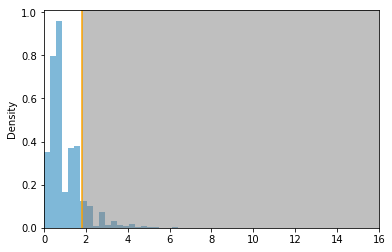

In [6]:
n = 5
alpha0 = 0.1

mu0 = 1

P_H0 = Poisson(mu0) ** n
S2_H0 = RV(P_H0, var) * n / (n - 1)
s2_H0 = S2_H0.sim(10000)
c0 = s2_H0.quantile(1 - alpha0)
size = s2_H0.count_geq(c0) / s2_H0.count()

s2_H0.plot('hist')
plt.xlim(0, 16)
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, 16, alpha = 0.5, color = 'gray');
c0

1.8000000000000003

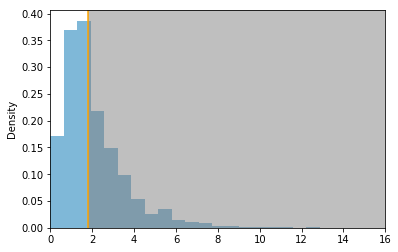

In [7]:
mu1 = 2

P_H1 = Poisson(mu1) ** n
S2_H1 = RV(P_H1, var) * n / (n - 1)
s2_H1 = S2_H1.sim(10000)
power = s2_H1.count_geq(c0) / s2_H1.count()

s2_H1.plot('hist')
plt.xlim(0, 16)
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, 16, alpha = 0.5, color = 'gray');
c0

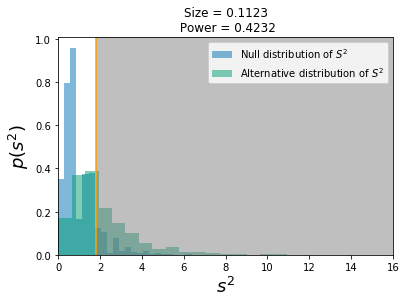

In [8]:
s2_H0.plot('hist')
s2_H1.plot('hist')

plt.xlim(0, 16)
plt.legend([r'Null distribution of $S^2$',
            r'Alternative distribution of $S^2$']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, 16, alpha = 0.5, color = 'gray');
plt.xlabel(r"$s^2$", fontsize=18)
plt.ylabel(r"$p(s^2)$", fontsize=18);
plt.title("Size = %s" % round(size, 4) + 
          "\n Power = %s" % round(power, 4));

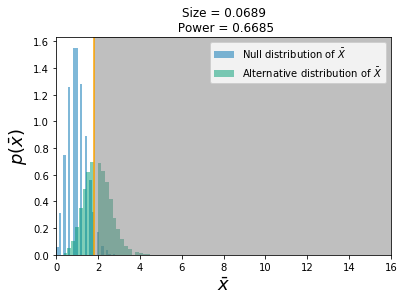

In [9]:
Xbar_H0 = RV(P_H0, mean)
xbar_H0 = Xbar_H0.sim(10000)
c0xbar = xbar_H0.quantile(1 - alpha0 + 0.05)
size = xbar_H0.count_geq(c0xbar) / xbar_H0.count()

Xbar_H1 = RV(P_H1, mean)
xbar_H1 = Xbar_H1.sim(10000)
power = xbar_H1.count_geq(c0xbar) / xbar_H1.count()

xbar_H0.plot('hist')
xbar_H1.plot('hist')

plt.xlim(0, 16)
plt.legend([r'Null distribution of $\bar{X}$',
            r'Alternative distribution of $\bar{X}$']);
plt.axvline(x = c0xbar, color = 'orange');
plt.axvspan(c0, 16, alpha = 0.5, color = 'gray');
plt.xlabel(r"$\bar{x}$", fontsize=18)
plt.ylabel(r"$p(\bar{x})$", fontsize=18);
plt.title("Size = %s" % round(size, 4) + 
          "\n Power = %s" % round(power, 4));

## Problem 4

In [10]:
n = 5

theta0 = 1

alpha0 = 0.05

c0 = Gamma(n, theta0).quantile(0.05)

c0

1.9701495680595302

In [11]:
theta1 = 2

Gamma(n, theta1).cdf(c0)

0.3595012421435454

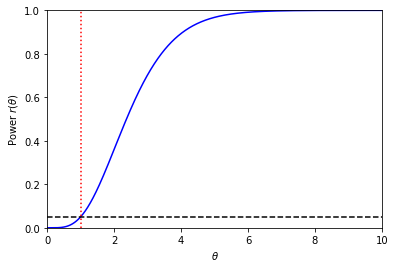

In [12]:
thetas = np.linspace(0.001, 10, 1000)
r = [Gamma(n, theta).cdf(c0) for theta in thetas]

plt.plot(thetas, r, "b-")

plt.xlim(0, 10)
plt.ylim(0, 1)
plt.axhline(y = alpha0, color = "black", linestyle = "dashed");
plt.axvline(x = theta0, color = "red", linestyle = "dotted");
plt.xlabel(r"$\theta$")
plt.ylabel(r"Power $r(\theta)$");


## Problem 6

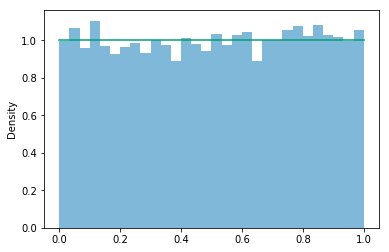

In [13]:
X = RV(Normal(0, 1))

def pvalue(x):
    return 2 * Normal(0, 1).cdf(-abs(x))

Pvalue = X.apply(pvalue)

Pvalue.sim(10000).plot()
Uniform(0, 1).plot()